<a href="https://colab.research.google.com/github/rsanlazaro/ImageProcessingFJ26/blob/main/ImageProcessingBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Loading and Basic Properties
## Introduction to Digital Images in Python

**Learning Objectives:**
- Understand how images are represented as numerical arrays
- Learn about different image file formats and their properties
- Explore color channels and color spaces
- Master basic image loading, display, and analysis techniques

---

## 1. Setup and Installation

First, let's import the necessary libraries and install any missing packages.

In [251]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import os

# Ensure required packages are installed
!pip install pillow requests numpy matplotlib -q

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.0.2


## 2. Helper Functions

Let's create some utility functions we'll use throughout this notebook.

In [252]:
def load_image_from_url(url, timeout=10):
    """
    Load an image from a URL with error handling

    Parameters:
    url (str): URL of the image
    timeout (int): Request timeout in seconds

    Returns:
    PIL.Image: Loaded image object or None if failed
    """
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()  # Raise error for bad status codes
        img = Image.open(BytesIO(response.content))

        # Convert to RGB if needed (handles various modes)
        if img.mode not in ['RGB', 'RGBA', 'L']:
            img = img.convert('RGB')

        return img
    except Exception as e:
        print(f"  Error: {str(e)[:80]}")
        return None

def print_image_info(img, name="Image"):
    """
    Print detailed information about an image

    Parameters:
    img: PIL Image or NumPy array
    name (str): Name for display
    """
    print(f"\n{'='*60}")
    print(f"Information for: {name}")
    print(f"{'='*60}")

    if isinstance(img, Image.Image):
        print(f"Format: {img.format}")
        print(f"Mode: {img.mode}")
        print(f"Size (width x height): {img.size[0]} x {img.size[1]} pixels")

        # Convert to numpy for more info
        img_array = np.array(img)
    else:
        img_array = img

    print(f"Array shape: {img_array.shape}")
    print(f"Data type: {img_array.dtype}")
    print(f"Min pixel value: {img_array.min()}")
    print(f"Max pixel value: {img_array.max()}")
    print(f"Mean pixel value: {img_array.mean():.2f}")
    print(f"Memory size: {img_array.nbytes / 1024:.2f} KB")

    # Determine number of channels
    if len(img_array.shape) == 2:
        print(f"Number of channels: 1 (Grayscale)")
    elif len(img_array.shape) == 3:
        print(f"Number of channels: {img_array.shape[2]}")

    print(f"{'='*60}\n")

print("Helper functions defined successfully!")

Helper functions defined successfully!


## 3. Loading Different Image Formats

### Understanding Image File Formats

Different image formats serve different purposes:

| Format | Compression | Transparency | Best Use Case | Typical Size |
|--------|-------------|--------------|---------------|-------------|
| **JPEG** | Lossy | No | Photos, natural images | Small |
| **PNG** | Lossless | Yes | Graphics, screenshots | Medium-Large |
| **GIF** | Lossless | Yes | Simple animations, logos | Small-Medium |
| **BMP** | None | No | Raw image data | Very Large |
| **TIFF** | Optional | Yes | Professional photography | Large |

Let's load examples of different formats:

In [265]:
# Using reliable free image sources
image_sources = {
    'jpeg_photo': 'https://picsum.photos/800/600.jpg',
    'png_graphic': 'https://www.python.org/static/community_logos/python-logo-master-v3-TM.png',
    '8_bit_example': 'https://p.turbosquid.com/ts-thumb/7O/LRP4EO/NJEMPa5k/first/jpg/1523287264/1920x1080/fit_q99/df486be4357381fea7d0c2e312f606a88ff411b4/first.jpg',
}

# Function to try multiple URLs
def load_image(url, name):
    """Try loading from multiple URLs"""
    img = load_image_from_url(url)
    if img is not None:
        print(f"Successfully loaded from source {url}")
        return img
    print(f"{name} could not be loaded")
    return None

# Load images
images = {}
print("Loading images...\n")

for name, url in image_sources.items():
    print(f"Loading {name}:")
    images[name] = load_image(url, name)
    print()

# Create synthetic images as backups
if images['jpeg_photo'] is None:
    print("Creating synthetic JPEG-style photo...")
    # Create a synthetic landscape image
    height, width = 400, 600
    img_array = np.zeros((height, width, 3), dtype=np.uint8)

    # Sky gradient (blue)
    for i in range(height//2):
        img_array[i, :, 2] = int(200 - (i / (height//2)) * 50)  # Blue
        img_array[i, :, 0] = int(100 + (i / (height//2)) * 50)  # Red

    # Ground (green/brown)
    for i in range(height//2, height):
        img_array[i, :, 1] = int(150 - ((i - height//2) / (height//2)) * 50)  # Green
        img_array[i, :, 0] = int(100 + ((i - height//2) / (height//2)) * 50)  # Red

    images['jpeg_photo'] = Image.fromarray(img_array)
    print("Created synthetic photo")

if images['png_graphic'] is None:
    print("Creating synthetic PNG graphic...")
    # Create a simple logo-style graphic with transparency
    size = 400
    img_array = np.zeros((size, size, 4), dtype=np.uint8)

    # Create a circle
    y, x = np.ogrid[-size//2:size//2, -size//2:size//2]
    radius = np.sqrt(x**2 + y**2)
    mask = radius <= size//2 - 20

    # Add colors
    img_array[mask, 0] = 70   # Red
    img_array[mask, 1] = 130  # Green
    img_array[mask, 2] = 180  # Blue
    img_array[mask, 3] = 255  # Alpha (fully opaque)

    # Add inner circle with different color
    inner_mask = radius <= size//4
    img_array[inner_mask, 0] = 255
    img_array[inner_mask, 1] = 200
    img_array[inner_mask, 2] = 0
    img_array[inner_mask, 3] = 125

    images['png_graphic'] = Image.fromarray(img_array, mode='RGBA')
    print("Created synthetic PNG with transparency")

# Create grayscale version
print("\nCreating grayscale version...")
if images['jpeg_photo']:
    images['grayscale'] = images['jpeg_photo'].convert('L')
    print("Grayscale version created")

print("\n" + "="*60)
print("Image Loading Summary:")
print("="*60)
for name, img in images.items():
    if img:
        mode_str = f"({img.mode})"
        size_str = f"{img.size[0]}x{img.size[1]}"
        print(f"{name:15s} {mode_str:8s} {size_str}")
    else:
        print(f"{name:15s} - Failed")
print("="*60)

Loading images...

Loading jpeg_photo:
Successfully loaded from source https://picsum.photos/800/600.jpg

Loading png_graphic:
Successfully loaded from source https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

Loading 8_bit_example:
Successfully loaded from source https://p.turbosquid.com/ts-thumb/7O/LRP4EO/NJEMPa5k/first/jpg/1523287264/1920x1080/fit_q99/df486be4357381fea7d0c2e312f606a88ff411b4/first.jpg


Creating grayscale version...
Grayscale version created

Image Loading Summary:
jpeg_photo      (RGB)    800x600
png_graphic     (RGBA)   601x203
8_bit_example   (RGB)    1920x1038
grayscale       (L)      800x600


## 4. Analyzing Image Properties

### 4.1 Color Image Analysis

**JPEG/RGB Images**
- Commonly use lossy compression for photos
- Store color information in RGB channels
- Each pixel has Red, Green, and Blue components


Information for: Color Photo
Format: JPEG
Mode: RGB
Size (width x height): 800 x 600 pixels
Array shape: (600, 800, 3)
Data type: uint8
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 55.92
Memory size: 1406.25 KB
Number of channels: 3



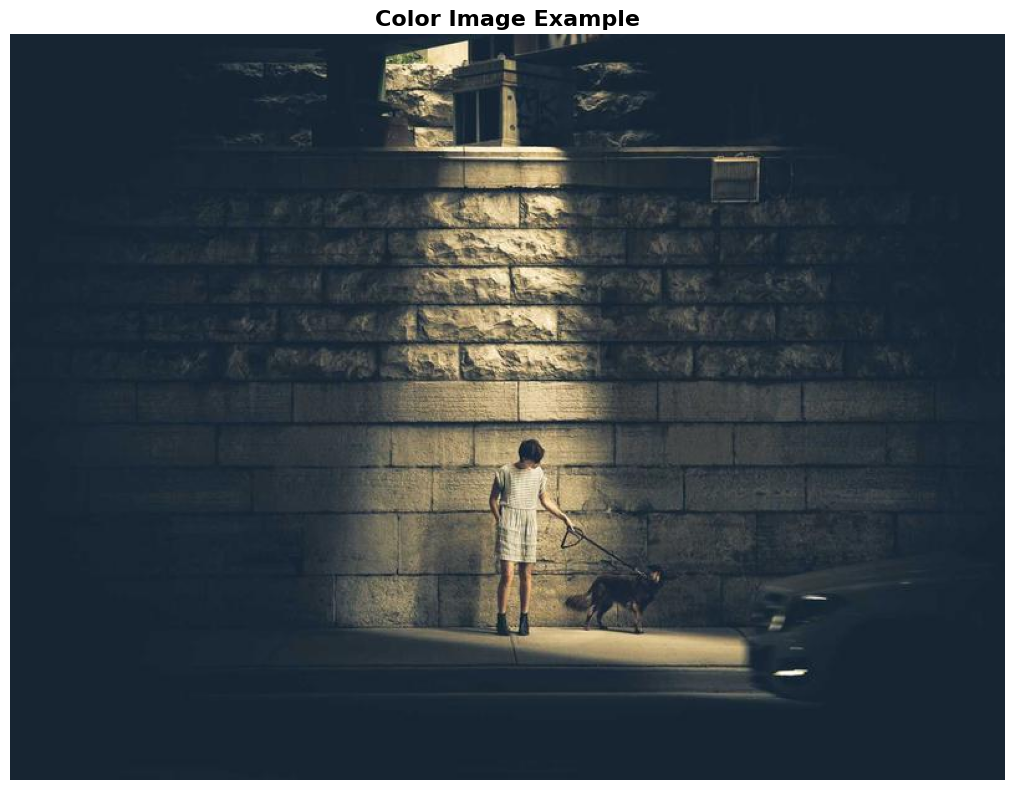

In [254]:
# Analyze color image
color_img = images['jpeg_photo']
print_image_info(color_img, "Color Photo")

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(color_img)
plt.title('Color Image Example', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### 4.2 PNG Image with Transparency

**PNG (Portable Network Graphics)**
- Lossless compression preserves quality
- Supports transparency (alpha channel)
- Better for graphics, text, sharp edges
- Larger file size than JPEG for photos


Information for: PNG Graphic
Format: PNG
Mode: RGBA
Size (width x height): 601 x 203 pixels
Array shape: (203, 601, 4)
Data type: uint8
Min pixel value: 49
Max pixel value: 255
Mean pixel value: 242.74
Memory size: 476.57 KB
Number of channels: 4



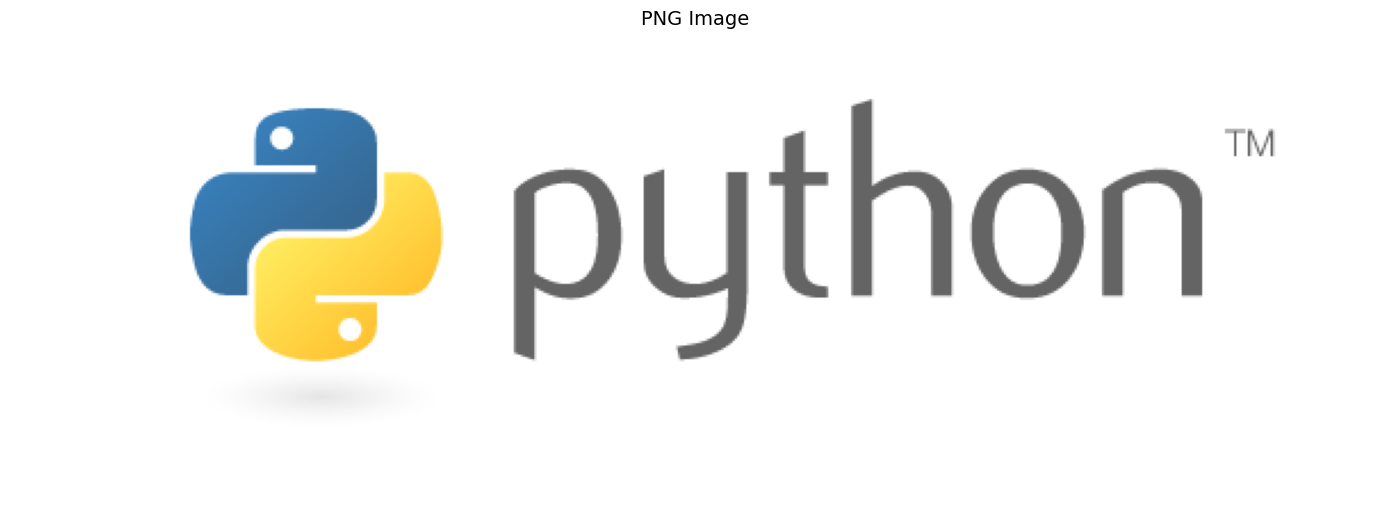


✓ This PNG has an alpha channel (transparency support)
Shape: (203, 601, 4)
Channels: Red, Green, Blue, Alpha

Alpha channel statistics:
  Min: 255 (fully transparent)
  Max: 255 (fully opaque)
  Mean: 255.0


In [255]:
# Analyze PNG image
png_img = images['png_graphic']
print_image_info(png_img, "PNG Graphic")

# Display the PNG image
plt.figure(figsize=(14, 6))

# Show on white background
plt.imshow(png_img)
plt.title('PNG Image', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# Check for alpha channel
if png_img.mode == 'RGBA':
    print("\n✓ This PNG has an alpha channel (transparency support)")
    png_array = np.array(png_img)
    print(f"Shape: {png_array.shape}")
    print("Channels: Red, Green, Blue, Alpha")
    print(f"\nAlpha channel statistics:")
    print(f"  Min: {png_array[:,:,3].min()} (fully transparent)")
    print(f"  Max: {png_array[:,:,3].max()} (fully opaque)")
    print(f"  Mean: {png_array[:,:,3].mean():.1f}")
elif png_img.mode == 'RGB':
    print("\nℹ This PNG doesn't have transparency (RGB mode)")

## 5. Understanding Image Representation as Arrays

### Key Concept: Images are Just Numbers!

Digital images are represented as multi-dimensional arrays:
- **Grayscale**: 2D array (height × width)
- **RGB Color**: 3D array (height × width × 3)
- **RGBA**: 3D array (height × width × 4)

In [256]:
# Convert images to NumPy arrays
color_array = np.array(images['jpeg_photo'])
gray_array = np.array(images['grayscale'])

print("Array Dimensions Analysis:")
print("\n" + "="*60)
print("COLOR IMAGE (RGB):")
print("="*60)
print(f"Shape: {color_array.shape}")
print(f"  Dimension 0 (height): {color_array.shape[0]} pixels")
print(f"  Dimension 1 (width):  {color_array.shape[1]} pixels")
if len(color_array.shape) == 3:
    print(f"  Dimension 2 (channels): {color_array.shape[2]} (R, G, B)")
print(f"Total pixels: {color_array.shape[0] * color_array.shape[1]:,}")
print(f"Total values: {color_array.size:,}")

print("\n" + "="*60)
print("GRAYSCALE IMAGE:")
print("="*60)
print(f"Shape: {gray_array.shape}")
print(f"  Dimension 0 (height): {gray_array.shape[0]} pixels")
print(f"  Dimension 1 (width):  {gray_array.shape[1]} pixels")
print(f"  Only 1 intensity value per pixel (no separate channels)")
print(f"Total pixels: {gray_array.shape[0] * gray_array.shape[1]:,}")

print("\n" + "="*60)
print("MEMORY COMPARISON:")
print("="*60)
print(f"Color image:     {color_array.nbytes / 1024:.2f} KB")
print(f"Grayscale image: {gray_array.nbytes / 1024:.2f} KB")
print(f"Ratio: {color_array.nbytes / gray_array.nbytes:.1f}x larger")

Array Dimensions Analysis:

COLOR IMAGE (RGB):
Shape: (600, 800, 3)
  Dimension 0 (height): 600 pixels
  Dimension 1 (width):  800 pixels
  Dimension 2 (channels): 3 (R, G, B)
Total pixels: 480,000
Total values: 1,440,000

GRAYSCALE IMAGE:
Shape: (600, 800)
  Dimension 0 (height): 600 pixels
  Dimension 1 (width):  800 pixels
  Only 1 intensity value per pixel (no separate channels)
Total pixels: 480,000

MEMORY COMPARISON:
Color image:     1406.25 KB
Grayscale image: 468.75 KB
Ratio: 3.0x larger


### 5.1 Visualizing a Small Image Patch as Numbers

Let's zoom in and look at actual pixel values!

10×10 PIXEL PATCH (Top-Left Corner)

RED CHANNEL VALUES:
[[23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]
 [23 23 23 23 23 23 23 23 23 23]]

GREEN CHANNEL VALUES:
[[37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]
 [37 37 37 37 37 37 37 37 37 37]]

BLUE CHANNEL VALUES:
[[50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50 50]
 [50 

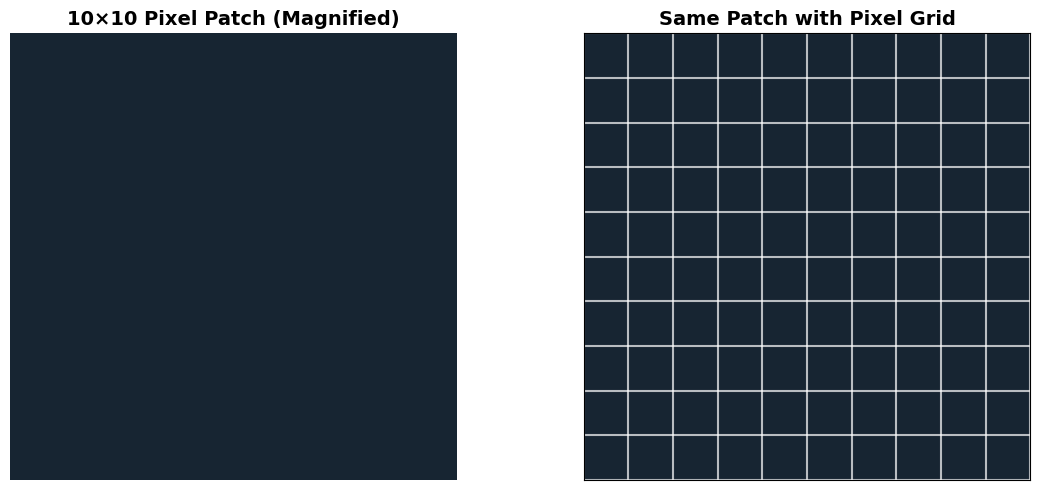

In [257]:
# Extract a small 10x10 patch from the top-left corner
patch_size = 10
patch = color_array[:patch_size, :patch_size, :] if len(color_array.shape) == 3 else color_array[:patch_size, :patch_size]

print("="*60)
print(f"10×10 PIXEL PATCH (Top-Left Corner)")
print("="*60)

if len(color_array.shape) == 3:
    print("\nRED CHANNEL VALUES:")
    print(patch[:, :, 0])
    print("\nGREEN CHANNEL VALUES:")
    print(patch[:, :, 1])
    print("\nBLUE CHANNEL VALUES:")
    print(patch[:, :, 2])

    # Show one pixel in detail
    print("\n" + "="*60)
    print("SINGLE PIXEL EXAMPLE:")
    print("="*60)
    print(f"Pixel at position (5, 5):")
    print(f"  Red:   {patch[5, 5, 0]:3d} (out of 255)")
    print(f"  Green: {patch[5, 5, 1]:3d} (out of 255)")
    print(f"  Blue:  {patch[5, 5, 2]:3d} (out of 255)")
    print(f"  RGB: ({patch[5, 5, 0]}, {patch[5, 5, 1]}, {patch[5, 5, 2]})")

# Visualize the patch
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(patch)
axes[0].set_title('10×10 Pixel Patch (Magnified)', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Show with grid to see individual pixels
axes[1].imshow(patch, interpolation='nearest')
axes[1].set_title('Same Patch with Pixel Grid', fontsize=14, fontweight='bold')
axes[1].grid(True, color='white', linewidth=1.5, alpha=0.7)
axes[1].set_xticks(np.arange(-0.5, patch_size, 1))
axes[1].set_yticks(np.arange(-0.5, patch_size, 1))
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].tick_params(length=0)

plt.tight_layout()
plt.show()

## 6. Color Channels Analysis

### Understanding RGB Color Model

RGB images have three color channels:
- **Red (R)**: Values 0-255 (0 = no red, 255 = maximum red)
- **Green (G)**: Values 0-255
- **Blue (B)**: Values 0-255

Any visible color can be created by mixing these three primary colors!

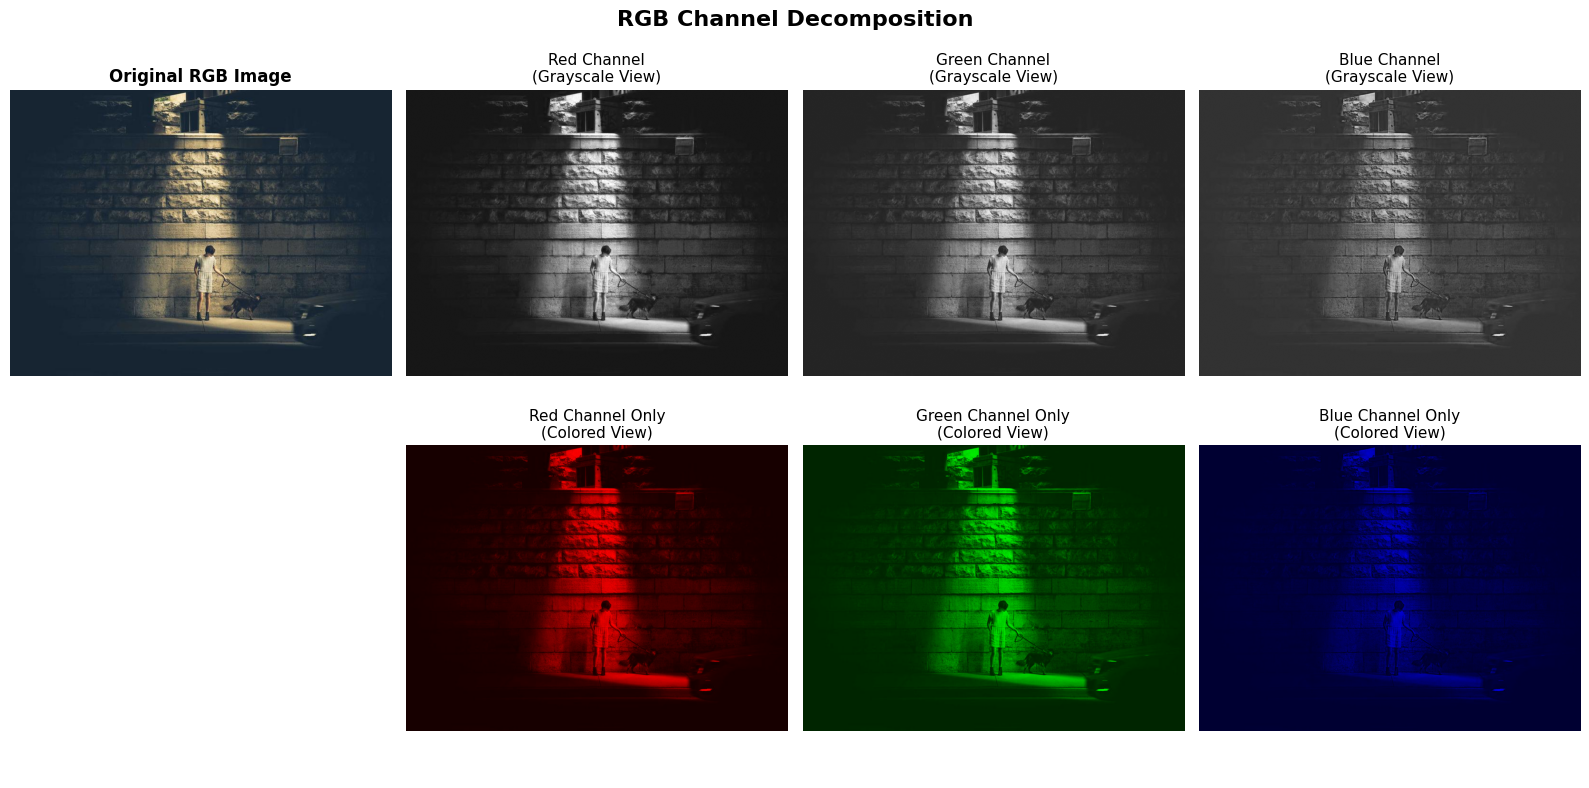


Channel Statistics:
Channel    Mean       Std Dev    Min    Max   
Red        48.13      44.86      6      255   
Green      57.09      36.39      1      255   
Blue       62.53      23.44      0      251   


In [258]:
# Extract individual color channels
if len(color_array.shape) == 3:
    red_channel = color_array[:, :, 0]
    green_channel = color_array[:, :, 1]
    blue_channel = color_array[:, :, 2]
else:
    # Handle grayscale
    red_channel = green_channel = blue_channel = color_array

# Create figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Row 1: Original and channels as grayscale
axes[0, 0].imshow(color_array)
axes[0, 0].set_title('Original RGB Image', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(red_channel, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('Red Channel\n(Grayscale View)', fontsize=11)
axes[0, 1].axis('off')

axes[0, 2].imshow(green_channel, cmap='gray', vmin=0, vmax=255)
axes[0, 2].set_title('Green Channel\n(Grayscale View)', fontsize=11)
axes[0, 2].axis('off')

axes[0, 3].imshow(blue_channel, cmap='gray', vmin=0, vmax=255)
axes[0, 3].set_title('Blue Channel\n(Grayscale View)', fontsize=11)
axes[0, 3].axis('off')

# Row 2: Channels in their respective colors
axes[1, 0].axis('off')  # Empty cell

red_colored = np.zeros_like(color_array)
if len(color_array.shape) == 3:
    red_colored[:, :, 0] = red_channel

green_colored = np.zeros_like(color_array)
if len(color_array.shape) == 3:
    green_colored[:, :, 1] = green_channel

blue_colored = np.zeros_like(color_array)
if len(color_array.shape) == 3:
    blue_colored[:, :, 2] = blue_channel

axes[1, 1].imshow(red_colored)
axes[1, 1].set_title('Red Channel Only\n(Colored View)', fontsize=11)
axes[1, 1].axis('off')

axes[1, 2].imshow(green_colored)
axes[1, 2].set_title('Green Channel Only\n(Colored View)', fontsize=11)
axes[1, 2].axis('off')

axes[1, 3].imshow(blue_colored)
axes[1, 3].set_title('Blue Channel Only\n(Colored View)', fontsize=11)
axes[1, 3].axis('off')

plt.suptitle('RGB Channel Decomposition', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\nChannel Statistics:")
print("="*60)
print(f"{'Channel':<10} {'Mean':<10} {'Std Dev':<10} {'Min':<6} {'Max':<6}")
print("="*60)
print(f"{'Red':<10} {red_channel.mean():<10.2f} {red_channel.std():<10.2f} {red_channel.min():<6} {red_channel.max():<6}")
print(f"{'Green':<10} {green_channel.mean():<10.2f} {green_channel.std():<10.2f} {green_channel.min():<6} {green_channel.max():<6}")
print(f"{'Blue':<10} {blue_channel.mean():<10.2f} {blue_channel.std():<10.2f} {blue_channel.min():<6} {blue_channel.max():<6}")
print("="*60)

## 7. RGB to Grayscale Conversion

### Standard Grayscale Conversion Formula

The human eye is more sensitive to green light, so the standard formula is:

**Gray = 0.299×R + 0.587×G + 0.114×B**

This is called the **luminosity method** and matches human perception.

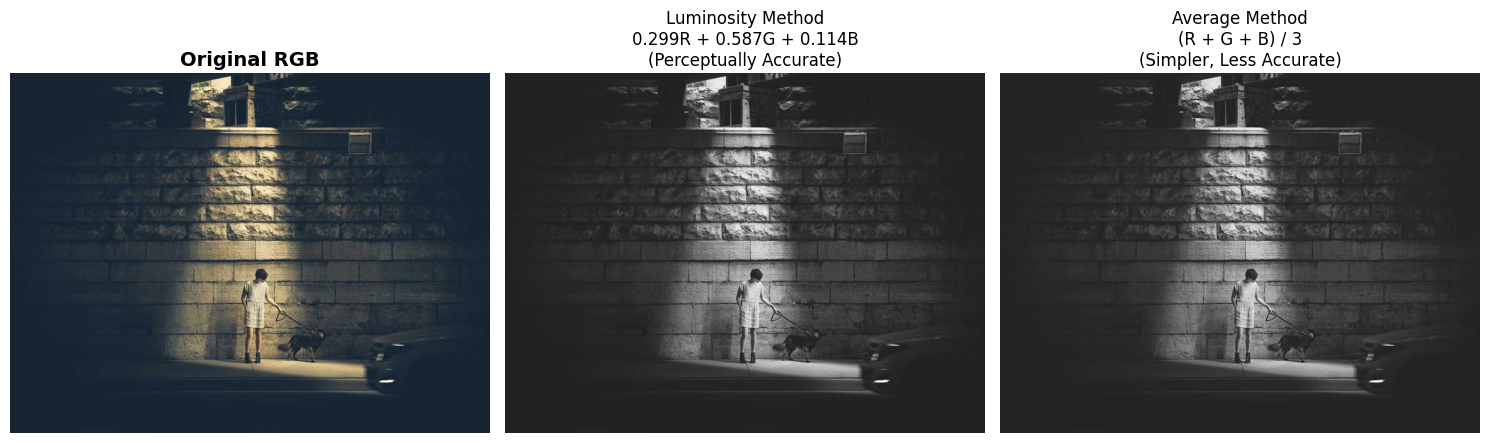


Grayscale Conversion Results:
Luminosity method:
  Shape: (600, 800)
  dtype: float64
  Range: [3.3, 254.5]

Average method:
  Shape: (600, 800)
  dtype: float64
  Range: [3.3, 253.7]

Average absolute difference: 2.44 per pixel


In [259]:
# Method 1: Using the standard formula (luminosity method)
def rgb_to_grayscale_luminosity(rgb_image):
    """
    Convert RGB to grayscale using luminosity method.
    This matches human perception of brightness.

    Formula: Gray = 0.299*R + 0.587*G + 0.114*B
    """
    if len(rgb_image.shape) == 2:
        return rgb_image  # Already grayscale
    return np.dot(rgb_image[..., :3], [0.299, 0.587, 0.114])

# Method 2: Simple average
def rgb_to_grayscale_average(rgb_image):
    """
    Convert RGB to grayscale using simple averaging.

    Formula: Gray = (R + G + B) / 3
    """
    if len(rgb_image.shape) == 2:
        return rgb_image  # Already grayscale
    return np.mean(rgb_image[:, :, :3], axis=2)

# Apply both methods
gray_luminosity = rgb_to_grayscale_luminosity(color_array)
gray_average = rgb_to_grayscale_average(color_array)

# Display comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(color_array)
axes[0].set_title('Original RGB', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(gray_luminosity, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Luminosity Method\n0.299R + 0.587G + 0.114B\n(Perceptually Accurate)', fontsize=12)
axes[1].axis('off')

axes[2].imshow(gray_average, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Average Method\n(R + G + B) / 3\n(Simpler, Less Accurate)', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\nGrayscale Conversion Results:")
print("="*60)
print(f"Luminosity method:")
print(f"  Shape: {gray_luminosity.shape}")
print(f"  dtype: {gray_luminosity.dtype}")
print(f"  Range: [{gray_luminosity.min():.1f}, {gray_luminosity.max():.1f}]")
print(f"\nAverage method:")
print(f"  Shape: {gray_average.shape}")
print(f"  dtype: {gray_average.dtype}")
print(f"  Range: [{gray_average.min():.1f}, {gray_average.max():.1f}]")
print(f"\nAverage absolute difference: {np.abs(gray_luminosity - gray_average).mean():.2f} per pixel")
print("="*60)

## 8. Data Types and Pixel Value Ranges

### Common Image Data Types:

- **uint8**: 0 to 255 (8 bits, most common for display)
- **uint16**: 0 to 65,535 (16 bits, medical/scientific imaging)
- **float32**: 0.0 to 1.0 (32 bits, processing)
- **float64**: 0.0 to 1.0 (64 bits, high precision)

**Why does this matter?**
- Memory usage
- Precision of calculations
- Compatibility with different libraries

In [260]:
# Original image (uint8)
img_uint8 = color_array.copy()

# Convert to float32 (0.0 to 1.0 range)
img_float32 = img_uint8.astype(np.float32) / 255.0

# Convert to float64 (higher precision)
img_float64 = img_uint8.astype(np.float64) / 255.0

print("="*70)
print("DATA TYPE COMPARISON")
print("="*70)

print("\nuint8 (Standard Display Format):")
print(f"  Data type:     {img_uint8.dtype}")
print(f"  Value range:   {img_uint8.min()} to {img_uint8.max()}")
print(f"  Memory size:   {img_uint8.nbytes / 1024:.2f} KB")
print(f"  Bits per pixel: 8")
print(f"  Total values:  256 possible values per channel")

print("\nfloat32 (Processing Format):")
print(f"  Data type:     {img_float32.dtype}")
print(f"  Value range:   {img_float32.min():.4f} to {img_float32.max():.4f}")
print(f"  Memory size:   {img_float32.nbytes / 1024:.2f} KB")
print(f"  Bits per pixel: 32")
print(f"  Precision:     ~7 decimal digits")

print("\nfloat64 (High Precision):")
print(f"  Data type:     {img_float64.dtype}")
print(f"  Value range:   {img_float64.min():.4f} to {img_float64.max():.4f}")
print(f"  Memory size:   {img_float64.nbytes / 1024:.2f} KB")
print(f"  Bits per pixel: 64")
print(f"  Precision:     ~15 decimal digits")

print("\n" + "="*70)
print("MEMORY IMPACT ANALYSIS:")
print("="*70)
print(f"  uint8:   {img_uint8.nbytes / 1024:.2f} KB  (baseline)")
print(f"  float32: {img_float32.nbytes / 1024:.2f} KB  ({img_float32.nbytes / img_uint8.nbytes:.1f}x larger)")
print(f"  float64: {img_float64.nbytes / 1024:.2f} KB  ({img_float64.nbytes / img_uint8.nbytes:.1f}x larger)")
print("\nTip: Use uint8 for display, float32 for processing!")
print("="*70)

DATA TYPE COMPARISON

uint8 (Standard Display Format):
  Data type:     uint8
  Value range:   0 to 255
  Memory size:   1406.25 KB
  Bits per pixel: 8
  Total values:  256 possible values per channel

float32 (Processing Format):
  Data type:     float32
  Value range:   0.0000 to 1.0000
  Memory size:   5625.00 KB
  Bits per pixel: 32
  Precision:     ~7 decimal digits

float64 (High Precision):
  Data type:     float64
  Value range:   0.0000 to 1.0000
  Memory size:   11250.00 KB
  Bits per pixel: 64
  Precision:     ~15 decimal digits

MEMORY IMPACT ANALYSIS:
  uint8:   1406.25 KB  (baseline)
  float32: 5625.00 KB  (4.0x larger)
  float64: 11250.00 KB  (8.0x larger)

Tip: Use uint8 for display, float32 for processing!


## 9. Pixel Access and Manipulation

### Accessing Individual Pixels

**Syntax:**
- Grayscale: `image[row, column]`
- Color: `image[row, column, channel]`

**Remember:** Indexing starts at 0!

In [261]:
# Get image dimensions
if len(color_array.shape) == 3:
    height, width, channels = color_array.shape
else:
    height, width = color_array.shape
    channels = 1

# Access pixel at specific location (center of image)
center_row = height // 2
center_col = width // 2

if len(color_array.shape) == 3:
    pixel_value = color_array[center_row, center_col, :]
else:
    pixel_value = color_array[center_row, center_col]

print("="*60)
print("IMAGE DIMENSIONS")
print("="*60)
print(f"Height:   {height} pixels")
print(f"Width:    {width} pixels")
print(f"Channels: {channels}")
print(f"Total pixels: {height * width:,}")

print("\n" + "="*60)
print(f"CENTER PIXEL at position ({center_row}, {center_col})")
print("="*60)
if len(color_array.shape) == 3:
    print(f"  Red:   {pixel_value[0]:3d} / 255")
    print(f"  Green: {pixel_value[1]:3d} / 255")
    print(f"  Blue:  {pixel_value[2]:3d} / 255")
    print(f"  RGB: ({pixel_value[0]}, {pixel_value[1]}, {pixel_value[2]})")
else:
    print(f"  Intensity: {pixel_value} / 255")

# Access corner pixels
print("\n" + "="*60)
print("CORNER PIXELS")
print("="*60)

if len(color_array.shape) == 3:
    corners = {
        'Top-left':     color_array[0, 0, :],
        'Top-right':    color_array[0, width-1, :],
        'Bottom-left':  color_array[height-1, 0, :],
        'Bottom-right': color_array[height-1, width-1, :]
    }
    for name, rgb in corners.items():
        print(f"{name:15s} RGB({rgb[0]:3d}, {rgb[1]:3d}, {rgb[2]:3d})")
else:
    corners = {
        'Top-left':     color_array[0, 0],
        'Top-right':    color_array[0, width-1],
        'Bottom-left':  color_array[height-1, 0],
        'Bottom-right': color_array[height-1, width-1]
    }
    for name, val in corners.items():
        print(f"{name:15s} Intensity: {val:3d}")

print("="*60)

IMAGE DIMENSIONS
Height:   600 pixels
Width:    800 pixels
Channels: 3
Total pixels: 480,000

CENTER PIXEL at position (300, 400)
  Red:   195 / 255
  Green: 168 / 255
  Blue:  125 / 255
  RGB: (195, 168, 125)

CORNER PIXELS
Top-left        RGB( 23,  37,  50)
Top-right       RGB( 23,  37,  50)
Bottom-left     RGB( 23,  37,  50)
Bottom-right    RGB( 23,  37,  50)


### Extracting Image Regions (Slicing)

**Slicing syntax:** `image[start_row:end_row, start_col:end_col]`

Region Extraction Example:
Original image shape:  (600, 800, 3)
Cropped region shape:  (100, 100, 3)

Extraction coordinates:
  Rows: 250 to 350
  Cols: 350 to 450


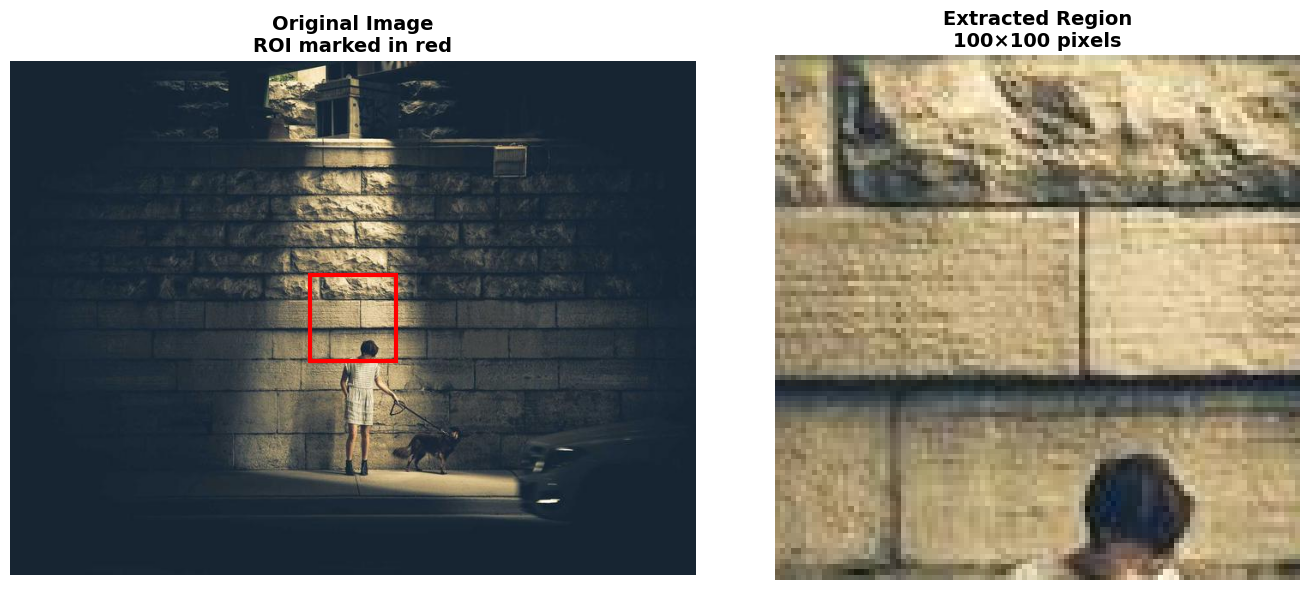

In [262]:
# Extract a rectangular region from center
crop_size = min(100, height // 2, width // 2)  # Ensure it fits
start_row = center_row - crop_size // 2
end_row = center_row + crop_size // 2
start_col = center_col - crop_size // 2
end_col = center_col + crop_size // 2

cropped_region = color_array[start_row:end_row, start_col:end_col]

print("Region Extraction Example:")
print("="*60)
print(f"Original image shape:  {color_array.shape}")
print(f"Cropped region shape:  {cropped_region.shape}")
print(f"\nExtraction coordinates:")
print(f"  Rows: {start_row} to {end_row}")
print(f"  Cols: {start_col} to {end_col}")
print("="*60)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Show original with rectangle
axes[0].imshow(color_array)
from matplotlib.patches import Rectangle
rect = Rectangle((start_col, start_row), crop_size, crop_size,
                 linewidth=3, edgecolor='red', facecolor='none')
axes[0].add_patch(rect)
axes[0].set_title(f'Original Image\nROI marked in red', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Show cropped region
axes[1].imshow(cropped_region)
axes[1].set_title(f'Extracted Region\n{crop_size}×{crop_size} pixels', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 10. Image Histograms

### What is a Histogram?

A histogram shows the **distribution** of pixel intensities:
- X-axis: Pixel intensity (0-255)
- Y-axis: Frequency (how many pixels have that intensity)

**What histograms tell us:**
- Dark image: Histogram concentrated on left
- Bright image: Histogram concentrated on right
- Low contrast: Narrow histogram
- High contrast: Wide, spread out histogram

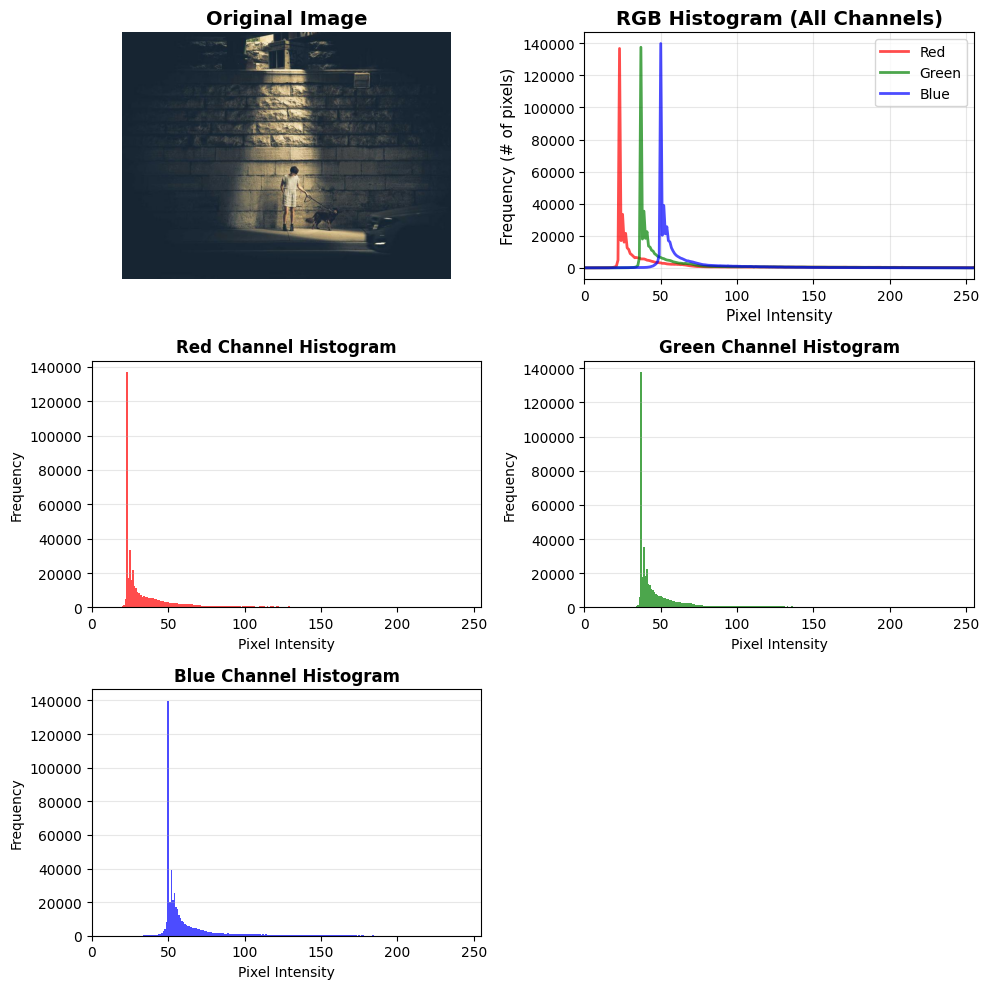


CHANNEL STATISTICS
Channel    Mean       Std Dev      Min    Max   
------------------------------------------------------------
Red           48.13        44.86      6    255
Green         57.09        36.39      1    255
Blue          62.53        23.44      0    251


In [263]:
# Calculate histograms for each channel
colors = ('red', 'green', 'blue')
channel_names = ('Red', 'Green', 'Blue')

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.delaxes(axes[2, 1])

# Show original image
axes[0, 0].imshow(color_array)
axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# RGB histogram combined
if len(color_array.shape) == 3:
    for i, (color, name) in enumerate(zip(colors, channel_names)):
        histogram, bins = np.histogram(color_array[:, :, i], bins=256, range=(0, 256))
        axes[0, 1].plot(bins[:-1], histogram, color=color, label=name, alpha=0.7, linewidth=2)

    axes[0, 1].set_title('RGB Histogram (All Channels)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Pixel Intensity', fontsize=11)
    axes[0, 1].set_ylabel('Frequency (# of pixels)', fontsize=11)
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_xlim(0, 255)

    # Individual channel histograms
    positions = [(1, 0), (1, 1), (2,0)]
    for i, (color, name) in enumerate(zip(colors[:3], channel_names[:3])):
        histogram, bins = np.histogram(color_array[:, :, i], bins=256, range=(0, 256))
        row, col = positions[i]
        axes[row, col].bar(bins[:-1], histogram, color=color, alpha=0.7, width=1)
        axes[row, col].set_title(f'{name} Channel Histogram', fontsize=12, fontweight='bold')
        axes[row, col].set_xlabel('Pixel Intensity', fontsize=10)
        axes[row, col].set_ylabel('Frequency', fontsize=10)
        axes[row, col].grid(True, alpha=0.3, axis='y')
        axes[row, col].set_xlim(0, 255)
else:
    # Grayscale histogram
    histogram, bins = np.histogram(color_array, bins=256, range=(0, 256))
    axes[0, 1].bar(bins[:-1], histogram, color='gray', alpha=0.7, width=1)
    axes[0, 1].set_title('Intensity Histogram', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Pixel Intensity', fontsize=11)
    axes[0, 1].set_ylabel('Frequency', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("CHANNEL STATISTICS")
print("="*60)
if len(color_array.shape) == 3:
    print(f"{'Channel':<10} {'Mean':<10} {'Std Dev':<12} {'Min':<6} {'Max':<6}")
    print("-" * 60)
    for i, name in enumerate(channel_names):
        channel_data = color_array[:, :, i]
        print(f"{name:<10} {channel_data.mean():>8.2f}   {channel_data.std():>10.2f}   {channel_data.min():>4}   {channel_data.max():>4}")
else:
    print(f"Mean:    {color_array.mean():.2f}")
    print(f"Std Dev: {color_array.std():.2f}")
    print(f"Min:     {color_array.min()}")
    print(f"Max:     {color_array.max()}")
print("="*60)

## 11. Creating Synthetic Images

Let's create images from scratch to understand the relationship between numbers and pixels!

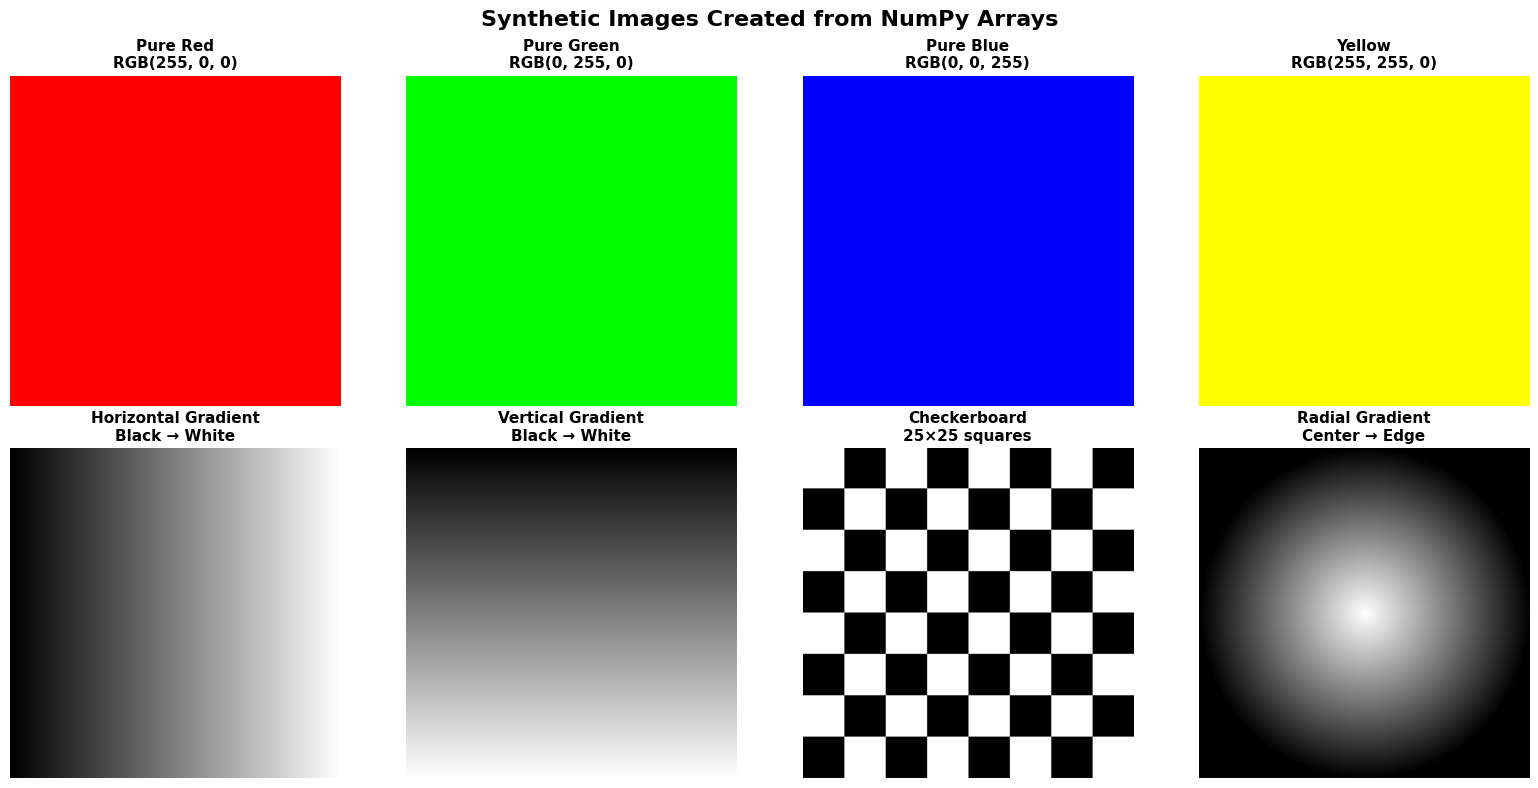


Key Insight: All these images are just NumPy arrays with different
   number patterns! Change the numbers, change the image.


In [264]:
# Function to create solid color images
def create_solid_color(height, width, r, g, b):
    "Create a solid color RGB image"
    img = np.zeros((height, width, 3), dtype=np.uint8)
    img[:, :, 0] = r  # Red
    img[:, :, 1] = g  # Green
    img[:, :, 2] = b  # Blue
    return img

# Function to create gradient
def create_gradient(height, width, direction='horizontal'):
    "Create a gradient image"
    img = np.zeros((height, width, 3), dtype=np.uint8)
    if direction == 'horizontal':
        for i in range(width):
            value = int(255 * i / (width - 1))
            img[:, i, :] = value
    else:  # vertical
        for i in range(height):
            value = int(255 * i / (height - 1))
            img[i, :, :] = value
    return img

# Function to create checkerboard
def create_checkerboard(height, width, square_size):
    "Create a checkerboard pattern"
    img = np.zeros((height, width), dtype=np.uint8)
    for i in range(0, height, square_size):
        for j in range(0, width, square_size):
            if (i // square_size + j // square_size) % 2 == 0:
                img[i:min(i+square_size, height),
                    j:min(j+square_size, width)] = 255
    return img

# Create sample images
size = 200
red_img = create_solid_color(size, size, 255, 0, 0)
green_img = create_solid_color(size, size, 0, 255, 0)
blue_img = create_solid_color(size, size, 0, 0, 255)
yellow_img = create_solid_color(size, size, 255, 255, 0)
gradient_h = create_gradient(size, size, 'horizontal')
gradient_v = create_gradient(size, size, 'vertical')
checkerboard = create_checkerboard(size, size, 25)

# Create radial gradient
y, x = np.ogrid[-size//2:size//2, -size//2:size//2]
radius = np.sqrt(x**2 + y**2)
radial = (255 * (1 - np.minimum(radius / (size//2), 1))).astype(np.uint8)

# Display all synthetic images
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

images_to_show = [
    (red_img, 'Pure Red\nRGB(255, 0, 0)'),
    (green_img, 'Pure Green\nRGB(0, 255, 0)'),
    (blue_img, 'Pure Blue\nRGB(0, 0, 255)'),
    (yellow_img, 'Yellow\nRGB(255, 255, 0)'),
    (gradient_h, 'Horizontal Gradient\nBlack → White'),
    (gradient_v, 'Vertical Gradient\nBlack → White'),
    (checkerboard, 'Checkerboard\n25×25 squares'),
    (radial, 'Radial Gradient\nCenter → Edge'),
]

for ax, (img, title) in zip(axes.flat, images_to_show):
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax.imshow(img)
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.axis('off')

plt.suptitle('Synthetic Images Created from NumPy Arrays',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\nKey Insight: All these images are just NumPy arrays with different")
print("   number patterns! Change the numbers, change the image.")

#### **Make your own 8-bit images**



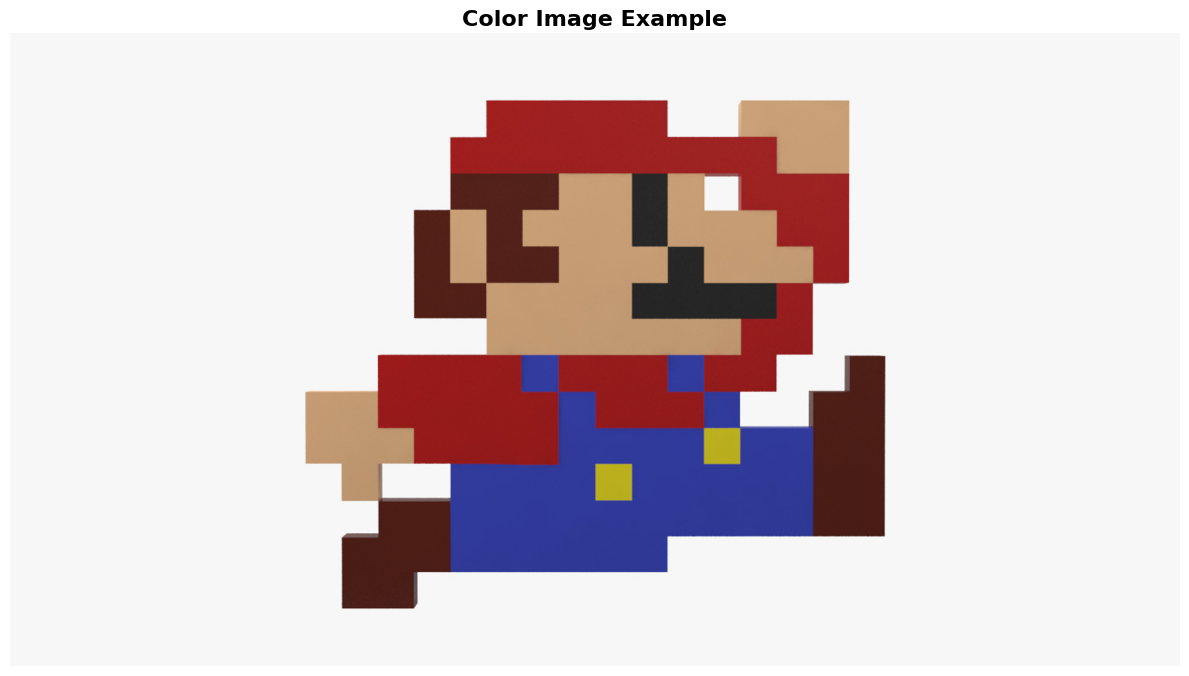

In [267]:
# Analyze color image
color_img = images['8_bit_example']

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(color_img)
plt.title('Color Image Example', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## 12. Summary and Key Takeaways

### What We Learned:

#### 1. **Image Representation**
- Images are multi-dimensional NumPy arrays of numbers
- Grayscale: 2D array (height × width)
- Color: 3D array (height × width × 3 channels)
- Each pixel is just a number or set of numbers!

#### 2. **File Formats**
- **JPEG**: Lossy compression, good for photos, no transparency
- **PNG**: Lossless compression, supports transparency, good for graphics
- Different formats = different tradeoffs in quality, size, features

#### 3. **Color Channels**
- RGB model: Red + Green + Blue
- Each channel: 0-255 for uint8 images
- Any color = combination of RGB values
- Channels can be separated and manipulated independently

#### 4. **Data Types**
- **uint8** (0-255): Standard for display, compact
- **float32/float64** (0.0-1.0): Better for processing
- Memory tradeoffs: float64 uses 8× more memory than uint8

#### 5. **Basic Operations**
- Accessing pixels: `image[row, col]` or `image[row, col, channel]`
- Slicing regions: `image[r1:r2, c1:c2]`
- Histograms: Show pixel intensity distribution
- Grayscale conversion: Weighted sum (0.299R + 0.587G + 0.114B)

---

### Next Steps:
1. Practice loading and analyzing your own images
2. Experiment with channel manipulation
3. Create more complex synthetic images
4. Learn about image transformations and filters

## Additional Resources

**Python Libraries:**
- NumPy documentation: https://numpy.org/doc/
- Matplotlib: https://matplotlib.org/
- PIL/Pillow: https://pillow.readthedocs.io/
- scikit-image: https://scikit-image.org/

**Image Processing Concepts:**
- Digital Image Processing (Gonzalez & Woods)
- OpenCV tutorials: https://docs.opencv.org/

---

**Questions? Stuck on exercises?**
- Review the examples above
- Check the NumPy documentation
- Experiment with small test arrays first
- Use `print()` statements to debug